In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm.notebook import tqdm
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import urllib.request
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix
import pickle

In [2]:
train_corroded=r"D:\8th Sem\MAJOR PROJECT\Data\Corroded"
train_non_corroded=r"D:\8th Sem\MAJOR PROJECT\Data\NonCorroded"

In [3]:
img=cv2.imread(r"D:\8th Sem\MAJOR PROJECT\Data\Corroded\1.png",-1)

In [4]:
img.shape

(480, 852, 3)

In [5]:
img1=img.flatten()
img1.shape

(1226880,)

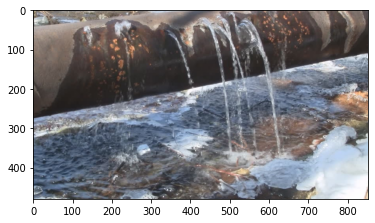

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
l=os.listdir(train_corroded)  #list all file name in the directory 
l

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [8]:
len(l)

808

In [9]:
l=os.listdir(train_non_corroded)  #list all file name in the directory 
l

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [10]:
len(l)

444

<pre>function train_data perform following operation for both folder corroded and non Corroded:
    1.Iterate through the all files in the folder
    2.join image name with folder path
    3.read image using open CV
    4.Resize the iamge
    5.fltten the 3D array as multi Dimentional array take more space
    6.Finally append in array</pre>

In [11]:
corroded=[] #this will used to store corroded image data
non_corroded=[] #this will used to store non_corroded image data
def train_data():
    for image in tqdm(os.listdir(train_non_corroded)):
        try:
            path=os.path.join(train_non_corroded,image)
            img=cv2.imread(path)
            img=cv2.resize(img,(256,256))
            non_corroded.append(img.flatten())
        except Exception as e:
            print(str(e))
    for image in tqdm(os.listdir(train_corroded)):
        try:
            path=os.path.join(train_corroded,image)
            img=cv2.imread(path)
            img=cv2.resize(img,(256,256))
            corroded.append(img.flatten())
        except Exception as e:
            print(str(e),image)
train_data()

  0%|          | 0/444 [00:00<?, ?it/s]

  0%|          | 0/808 [00:00<?, ?it/s]

In [12]:
y1=np.ones(len(corroded))  #assigning one corrospond to corroded image
y0=np.zeros(len(non_corroded))  #assigning zero corrospond to non_corroded image

In [13]:
y=np.hstack((y1,y0))  #horizontally stack both

In [14]:
c=np.array(corroded) 
n=np.array(non_corroded)

In [15]:
c.shape

(808, 196608)

In [16]:
n.shape

(444, 196608)

In [17]:
x=np.vstack((c,n)) #vertically stack both

In [18]:
x

array([[163, 181, 190, ..., 183, 212, 228],
       [161, 187, 194, ..., 184, 182, 173],
       [188, 214, 237, ...,  39,  37,  36],
       ...,
       [ 76, 109, 150, ..., 154, 181, 195],
       [255, 255, 255, ..., 100, 111, 193],
       [253, 253, 253, ...,  74,  63,  68]], dtype=uint8)

In [19]:
y   #output value 1 corrospond to corrodded and 0 corrospond non corroded

array([1., 1., 1., ..., 0., 0., 0.])

### Model Training

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.1)

In [21]:
y_train

array([0., 1., 1., ..., 0., 1., 1.])

#### Logistic Regression

In [66]:
lr=LogisticRegression(max_iter=1000)

In [67]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [68]:
lr.score(x_train,y_train)

1.0

In [69]:
cross_val_score(lr,x_train,y_train).mean()

0.7326764995083579

In [26]:
lr.score(x_test,y_test)

0.7777777777777778

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

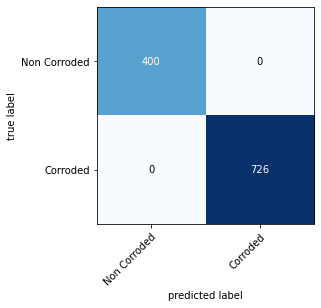

In [27]:
plot_confusion_matrix(confusion_matrix(y_train,lr.predict(x_train)),class_names=["Non Corroded","Corroded"])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

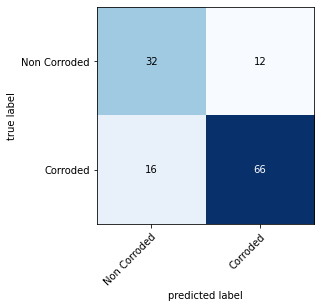

In [28]:
plot_confusion_matrix(confusion_matrix(y_test,lr.predict(x_test)),class_names=["Non Corroded","Corroded"])

#### Decision Tree

In [29]:
DT=DecisionTreeClassifier()

In [30]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
DT.score(x_train,y_train)

1.0

In [32]:
cross_val_score(DT,x_train,y_train).mean()

0.7282320550639134

In [33]:
DT.score(x_test,y_test)

0.7142857142857143

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

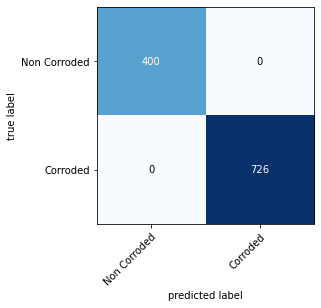

In [34]:
plot_confusion_matrix(confusion_matrix(y_train,DT.predict(x_train)),class_names=["Non Corroded","Corroded"])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

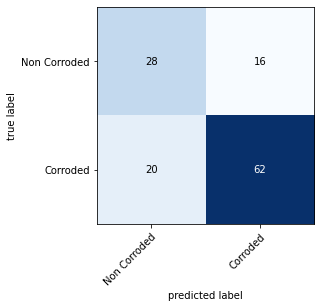

In [35]:
plot_confusion_matrix(confusion_matrix(y_test,DT.predict(x_test)),class_names=["Non Corroded","Corroded"])

#### Support Vector Machine

In [36]:
svc=SVC()

In [37]:
svc.fit(x_train,y_train)

SVC()

In [38]:
svc.score(x_train,y_train)

0.955595026642984

In [39]:
cross_val_score(svc,x_train,y_train).mean()

0.8268161258603737

In [40]:
svc.score(x_test,y_test)

0.873015873015873

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

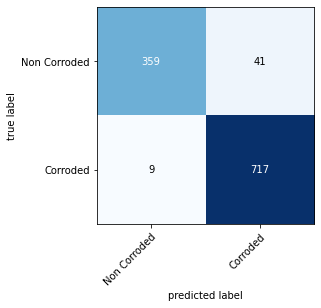

In [41]:
plot_confusion_matrix(confusion_matrix(y_train,svc.predict(x_train)),class_names=["Non Corroded","Corroded"])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

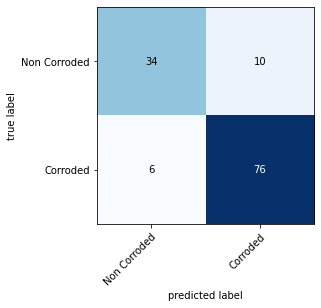

In [42]:
plot_confusion_matrix(confusion_matrix(y_test,svc.predict(x_test)),class_names=["Non Corroded","Corroded"])

###### Achieved max. cv score using svm of 0.95 on traing set and 0.87 on test set

In [58]:
with open('ml.pkl', 'wb') as file:
    pickle.dump(svc, file)

In [61]:
ml=None
with open('ml.pkl', 'rb') as file:
    ml=pickle.load(file)

### Prediction Function

In [62]:
def predict(url):
    
    if url[0:4]=="http":
        urllib.request.urlretrieve(url,"a.png")
        url="a.png"
    
    img=cv2.imread(url)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    img=cv2.resize(img,(256,256))
    img=img.flatten()
    
    pred=ml.predict([img])
    
    if pred[0]==1:
        print("CORRODED")
    else:
        print("NOT CORRODED")
        
    

CORRODED


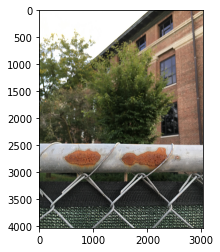

In [63]:
url=r"D:\8th Sem\MAJOR PROJECT\Data\Corroded\95.png"
predict(url)

CORRODED


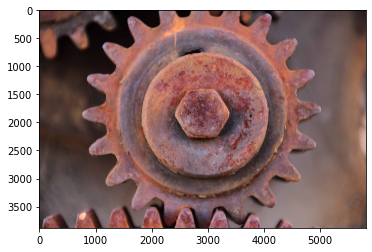

In [64]:
url=r"D:\8th Sem\MAJOR PROJECT\Data\Corroded\2.png"
predict(url)

CORRODED


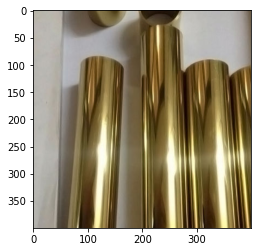

In [65]:
url=r"D:\8th Sem\MAJOR PROJECT\Data\NonCorroded\214.png"
predict(url)